In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

Saving kaggle.json to kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 51.9MB/s]


In [ ]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

# بارگذاری مجموعه داده
data = pd.read_csv('dataset.csv')

# نمایش پنج سطر اول داده‌ها
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# تحلیل توزیع اولیه داده‌ها
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


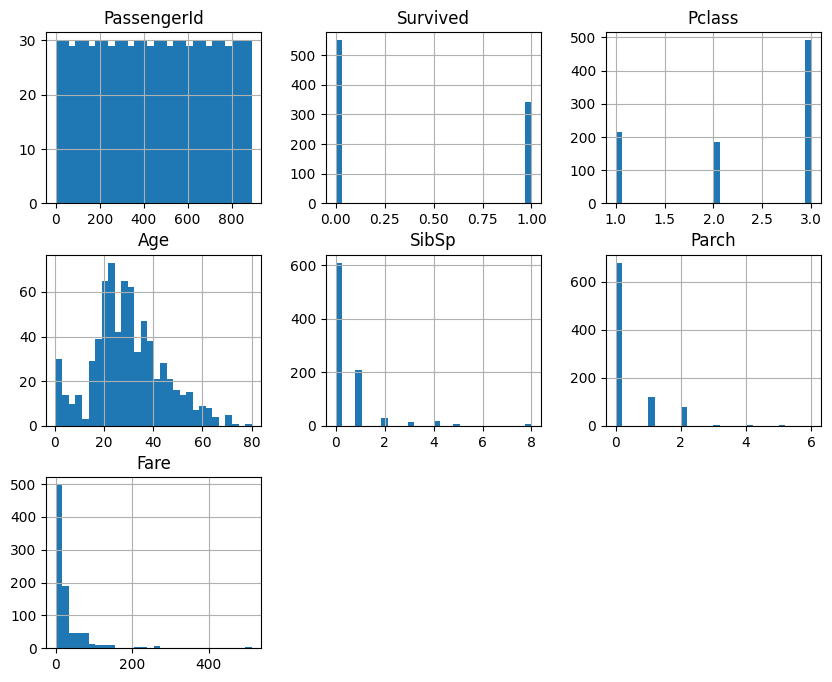

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# هیستوگرام
data.hist(bins=30, figsize=(10, 8))
plt.show()

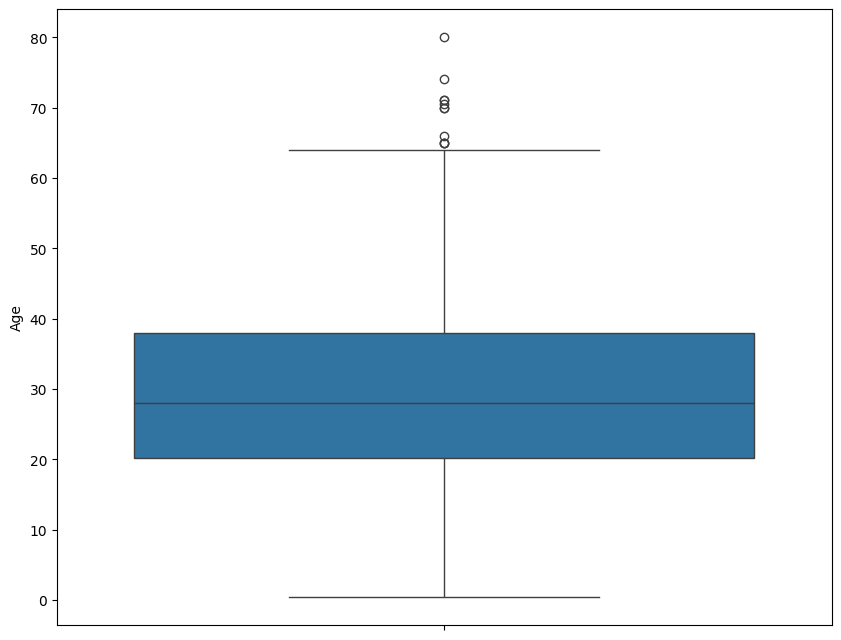

In [ ]:
# نمودار جعبه‌ای برای ویژگی سن
plt.figure(figsize=(10, 8))
sns.boxplot(y=data['Age'])
plt.show()

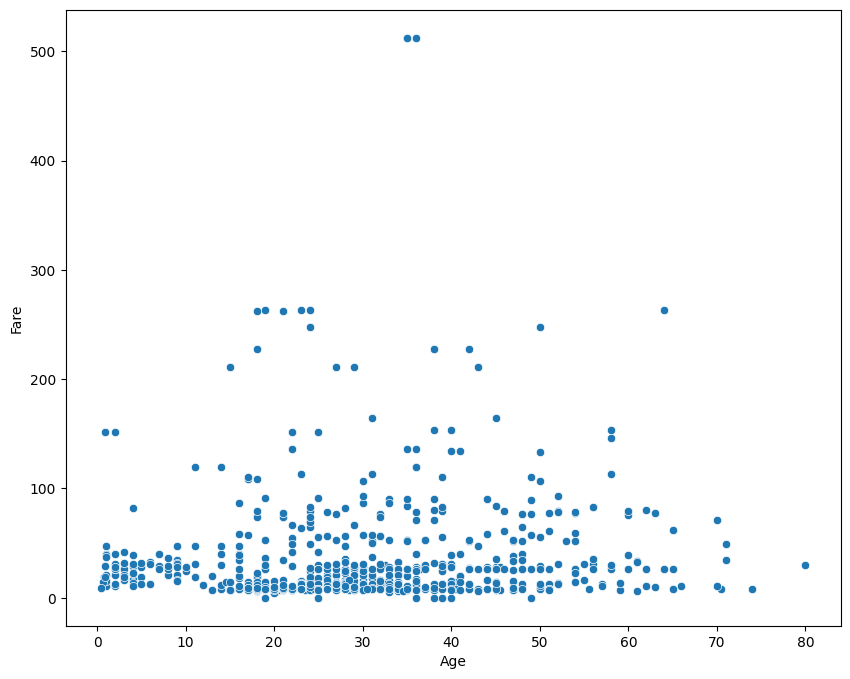

In [ ]:
# نمودار پراکندگی برای ویژگی سن در مقابل قیمت بلیت
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Fare'])
plt.show()

In [ ]:
from scipy.stats import shapiro, kstest

# حذف مقادیر گمشده در ستون سن
age_data = data['Age'].dropna()

# آزمون شاپیرو-ویلک برای بررسی نرمال بودن داده‌ها
stat, p = shapiro(age_data)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

# آزمون کولموگروف-اسمیرنوف برای بررسی نرمال بودن داده‌ها
stat, p = kstest(age_data, 'norm')
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test: Statistics=0.981, p=0.000
Kolmogorov-Smirnov Test: Statistics=0.965, p=0.000


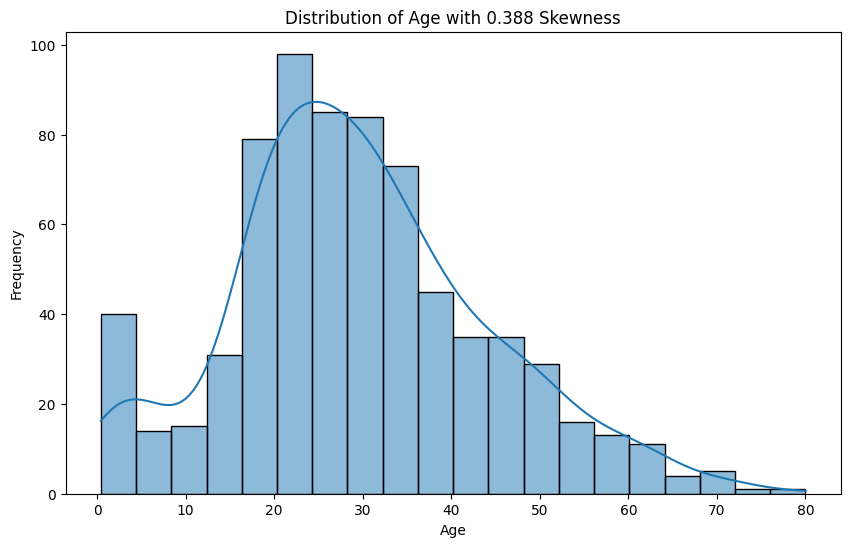

In [ ]:
from scipy.stats import skew

# حذف مقادیر گمشده در ستون سن
age_data = data['Age'].dropna()

# محاسبه چولگی
age_skewness = skew(age_data)

# بصری‌سازی توزیع سنی با استفاده از هیستوگرام
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True)
plt.title(f'Distribution of Age with {round(age_skewness, 3)} Skewness')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

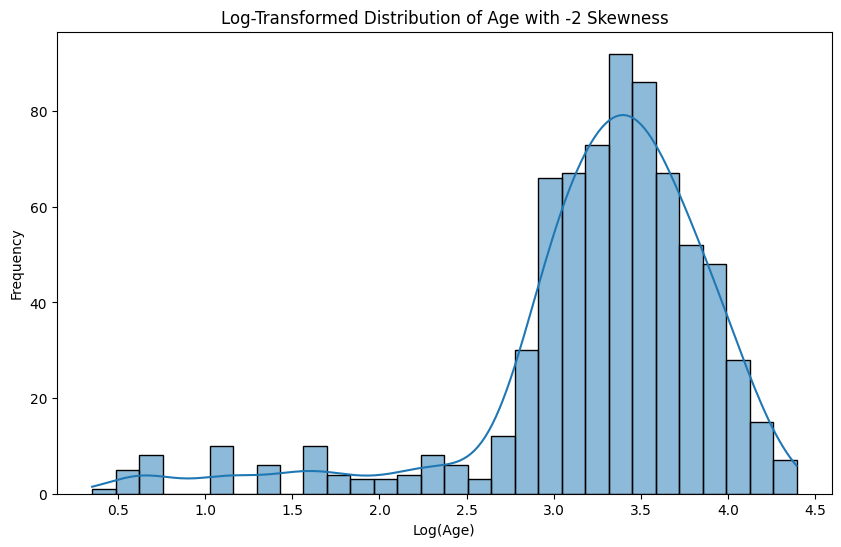

In [ ]:
import numpy as np

# تبدیل لگاریتمی
age_log_transformed = np.log1p(age_data)

# محاسبه چولگی بعد از لگاریتم گیری
age_skewness = skew(age_log_transformed)

# بصری‌سازی توزیع سنی پس از تبدیل لگاریتمی
plt.figure(figsize=(10, 6))
sns.histplot(age_log_transformed, kde=True)
plt.title(f'Log-Transformed Distribution of Age with {round(age_skewness)} Skewness')
plt.xlabel('Log(Age)')
plt.ylabel('Frequency')
plt.show()

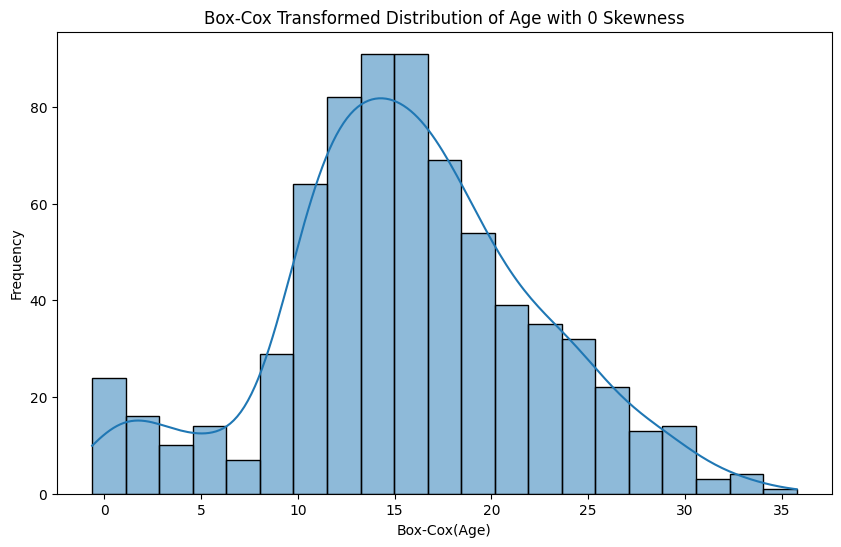

In [ ]:
from scipy.stats import boxcox

# تبدیل Box-Cox
age_boxcox_transformed, _ = boxcox(age_data)

# Box-Cox محاسبه چولگی بعد از
age_skewness = skew(age_boxcox_transformed)

# بصری‌سازی توزیع سنی پس از تبدیل Box-Cox
plt.figure(figsize=(10, 6))
sns.histplot(age_boxcox_transformed, kde=True)
plt.title(f'Box-Cox Transformed Distribution of Age with {round(age_skewness)} Skewness')
plt.xlabel('Box-Cox(Age)')
plt.ylabel('Frequency')
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# تغییر شکل داده‌ها
age_boxcox_transformed = age_boxcox_transformed.reshape(-1, 1)

# استانداردسازی داده‌ها
scaler = StandardScaler()
age_scaled = scaler.fit_transform(age_boxcox_transformed)

# نرمال‌سازی داده‌ها
scaler = MinMaxScaler()
age_normalized = scaler.fit_transform(age_boxcox_transformed)

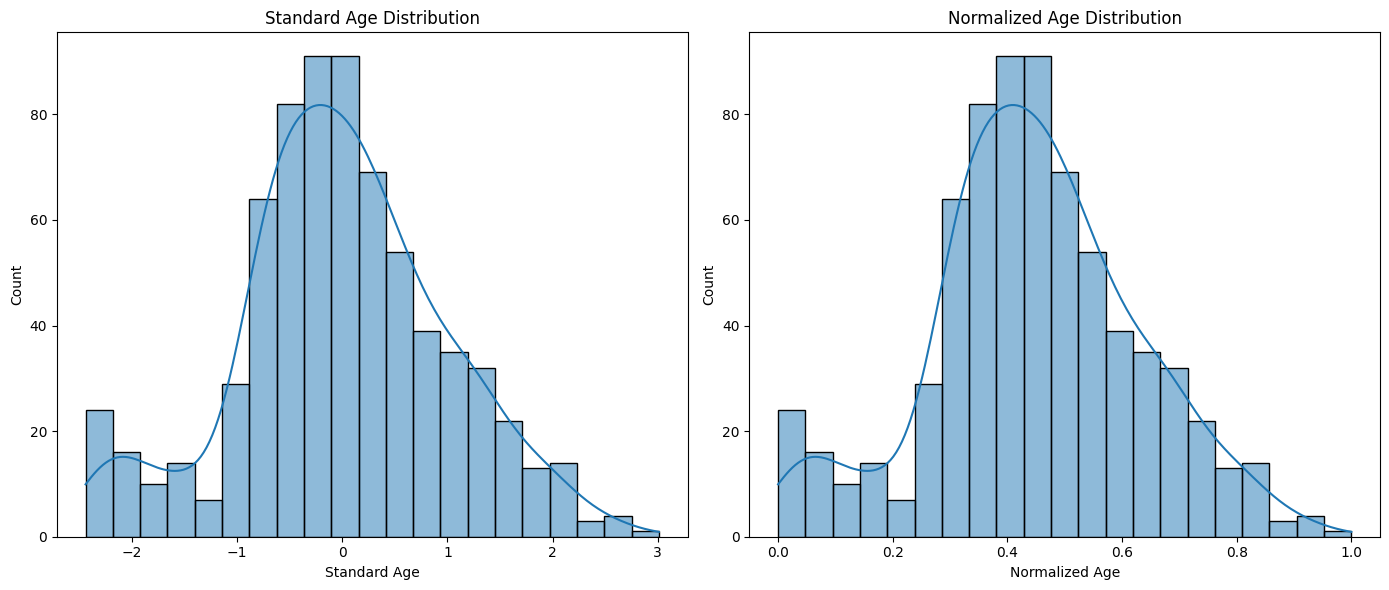

In [72]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(age_scaled, kde=True, legend=False)
plt.title('Standard Age Distribution')
plt.xlabel('Standard Age')

plt.subplot(1, 2, 2)
sns.histplot(age_normalized, kde=True, legend=False)
plt.title('Normalized Age Distribution')
plt.xlabel('Normalized Age')

plt.tight_layout()
plt.show()